In [1]:
from easyocr import Reader
import argparse
import cv2

In [2]:
# strip out non-ASCII text so we can draw the text on the image
# using OpenCV as it's putText function can't handle non ASCII 
# charachters (as of the current version '4.4.0')

def cleanup_text(text):
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [8]:
# if you want to use an image url
# otherwise comment out this block
# and use the "image_path" variable instead of "image_url"

# import the necessary packages
import numpy as np
import urllib

def url_to_image(url):
    # download the image, convert it to a NumPy array, 
    # and then read it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    # return the image
    return image

In [12]:
# # path to input image to be OCR'd
# # type=str, default="en"
# image_path = ""

# image url
image_url = "https://www.dharshanadss.com/wp-content/uploads/2019/10/Flex-Signboard.jpg"

# comma separated list of languages to OCR
# type=str, default="en"
languages = ["en"]

# whether or not GPU should be used
# type=bool, default=false
use_gpu = True

In [ ]:
# Note: Unlike Tesseract, EasyOCR can work with OpenCV’s 
#         default BGR color channel ordering. 
#         Therefore, we do not need to swap color channels 
#         after loading the image.

In [9]:
# # load the input image from disk
# image = cv2.imread(image_path)

# or

image = url_to_image(image_url)

In [13]:
# OCR the input image using EasyOCaR
reader = Reader(languages, use_gpu)

In [15]:
results = reader.readtext(image)

In [16]:
# loop over the results
for (bbox, text, prob) in results:
    
    # display the OCR'd text and associated probability
    print("[INFO] {:.4f}: {}".format(prob, text))
    
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # cleanup the text and draw the box surrounding the text along
    # with the OCR'd text itself
    text = cleanup_text(text)
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

[INFO] 0.9553: UDAY
[INFO] 0.7979: BHOJNALAV
[INFO] 0.9929: Order
[INFO] 0.7662: Food
[INFO] 0.9215: Online
[INFO] 0.6739: 9324908730
[INFO] 0.0832: BY UDAY TIFFIN SERVICE . UDAY SINGH
[INFO] 0.7959: foodpanda
[INFO] 0.0006: Shop llo.I2, Building Ha.G, Ideal Enclave, Near
[INFO] 0.0065: Qrarso
[INFO] 0.0000: Hospit4 ldeslPat Leepd lleel faq lia ieuf#|
[INFO] 0.4836: Flex Sign Board
[INFO] 0.2637: Backlite Starflex


In [19]:
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, "OCR'd image")

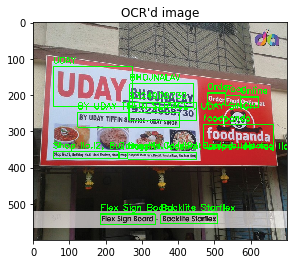

In [18]:
# if you want to use matplotlib to show the 
# image inline in jupyter


from matplotlib import pyplot as plt

# convert to RGB for plt as opencv defaults to BGR
image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# or use the following python slice notation expression
# to do the same thing
#
# image_ = image[:,:,::-1]

plt.imshow(image_)
plt.title("OCR'd image")

#################################################

### To use the virtualenv kernel in jupyter

activate the environment, then

`
pip install --user ipykernel
python -m ipykernel install --user --name=myenv
`

substituting --name=myenv with your virtualenv name

### installation / setup

`
pip install opencv-python
pip install easyocr
`

NOTE: easyocr installation takes care of torch

- Detailed usage instructions for the EasyOCR library
https://github.com/JaidedAI/EasyOCR#usage

#### references and credits:
https://www.pyimagesearch.com/2020/09/14/getting-started-with-easyocr-for-optical-character-recognition/